In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn import preprocessing,svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pickle
import xgboost
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn import *

In [40]:
train = pd.read_csv('finalloantrain.csv')
test = pd.read_csv('finalloantest.csv')

In [41]:
train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Job_Type,Income_Tax
0,LP001002,Male,No,0,Graduate,No,52000,0.0,NaN,360.0,1.0,Urban,Y,Private,Yes
1,LP001003,Male,Yes,1,Graduate,No,30760,1508.0,128.0,360.0,1.0,Rural,N,Government,No
2,LP001005,Male,Yes,0,Graduate,Yes,60000,0.0,66.0,360.0,1.0,Urban,Y,Private,Yes
3,LP001006,Male,Yes,0,Not Graduate,No,42300,2358.0,120.0,360.0,1.0,Urban,Y,Business,Yes
4,LP001008,Male,No,0,Graduate,No,20000,0.0,141.0,360.0,1.0,Urban,Y,Government,No
5,LP001011,Male,Yes,2,Graduate,Yes,32333,4196.0,267.0,360.0,1.0,Urban,Y,Private,No
6,LP001013,Male,Yes,0,Not Graduate,No,55000,1516.0,95.0,360.0,1.0,Urban,Y,Business,Yes
7,LP001014,Male,Yes,3+,Graduate,No,41256,2504.0,158.0,360.0,0.0,Semiurban,N,Government,No
8,LP001018,Male,Yes,2,Graduate,No,13633,1526.0,168.0,360.0,1.0,Urban,Y,Government,No
9,LP001020,Male,Yes,1,Graduate,No,34000,10968.0,349.0,360.0,1.0,Semiurban,N,Government,No


In [42]:
train['Loan_Status'].value_counts()
#It is unbalanced dataset.

Y    422
N    192
Name: Loan_Status, dtype: int64

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Job_Type           614 non-null    object 
 14  Income_Tax         614 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 72.1+ KB


In [44]:
#droping loan_ID column as number of rows is equal to number of unique values in this column. 
train=train.drop('Loan_ID',axis=1)
ID= test['Loan_ID']
test=test.drop('Loan_ID',axis=1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Job_Type,Income_Tax
0,Male,No,0,Graduate,No,52000,0.0,NaN,360.0,1.0,Urban,Y,Private,Yes
1,Male,Yes,1,Graduate,No,30760,1508.0,128.0,360.0,1.0,Rural,N,Government,No
2,Male,Yes,0,Graduate,Yes,60000,0.0,66.0,360.0,1.0,Urban,Y,Private,Yes
3,Male,Yes,0,Not Graduate,No,42300,2358.0,120.0,360.0,1.0,Urban,Y,Business,Yes
4,Male,No,0,Graduate,No,20000,0.0,141.0,360.0,1.0,Urban,Y,Government,No


In [45]:
# creating a list of categorical features
cat_features=[feature for feature in train.columns if train[feature].dtype == 'object']
cat_features.remove('Loan_Status')
cat_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Job_Type',
 'Income_Tax']

In [46]:
# numerical features
num_features=[feature for feature in train.columns if train[feature].dtype != 'O']
num_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [47]:
#continuous and discrete feaures 
con_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
discrete_features = ['Loan_Amount_Term','Credit_History']

# Data analysis
Here Analyzing mean and median applicant income,coapplicant income and loan amount and how it effects the loan status.

In [48]:
for feature in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    print(feature,'\nMean \n',train.groupby('Loan_Status')[feature].mean(),'\n')
    print('Median \n',train.groupby('Loan_Status')[feature].median(),'\n')

ApplicantIncome 
Mean 
 Loan_Status
N    33047.812500
Y    35352.241706
Name: ApplicantIncome, dtype: float64 

Median 
 Loan_Status
N    30745.5
Y    32347.5
Name: ApplicantIncome, dtype: float64 

CoapplicantIncome 
Mean 
 Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64 

Median 
 Loan_Status
N     268.0
Y    1239.5
Name: CoapplicantIncome, dtype: float64 

LoanAmount 
Mean 
 Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64 

Median 
 Loan_Status
N    129.0
Y    126.0
Name: LoanAmount, dtype: float64 



#
Analyzing loan status for each categorical feature

In [49]:
for i,feature in enumerate(cat_features):
    print(train.groupby([feature,'Loan_Status'])['Loan_Status'].count())

Gender  Loan_Status
Female  N               37
        Y               75
Male    N              150
        Y              339
Name: Loan_Status, dtype: int64
Married  Loan_Status
No       N               79
         Y              134
Yes      N              113
         Y              285
Name: Loan_Status, dtype: int64
Dependents  Loan_Status
0           N              107
            Y              238
1           N               36
            Y               66
2           N               25
            Y               76
3+          N               18
            Y               33
Name: Loan_Status, dtype: int64
Education     Loan_Status
Graduate      N              140
              Y              340
Not Graduate  N               52
              Y               82
Name: Loan_Status, dtype: int64
Self_Employed  Loan_Status
No             N              157
               Y              343
Yes            N               26
               Y               56
Name: Loan_Status,

Exploring each categorical feature and understanding the relationship between each feature and Loan status.

Observations:

1) Loan approval is more for Males.

2) There are more married applicants and the percentage of approval seems to be more for married applicants.

3) Applicants with 0 dependents are more and the percentage of approval seems to be higher for applicants with 2 dependents.

4) Non graduate applicants are less compared to graduate applicants and percentage of approval is less for non graduate applicants.

5) Major fraction of the applicants are not self-employed.

6) More number of applicants are from semi-urban areas. Percentage of approval is highest for applicants from semi-urban areas and is least for appicants from rural areas.

For all the categorical features, checking the frequency of loan eligibility for male and female applicants

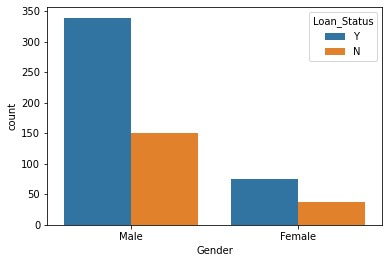

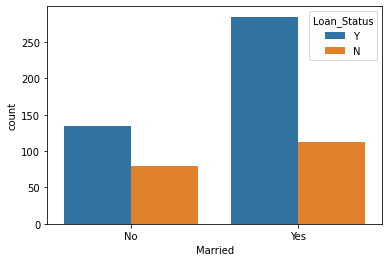

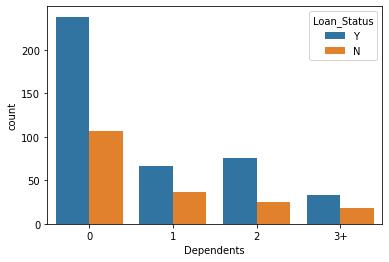

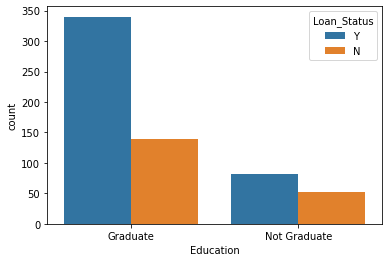

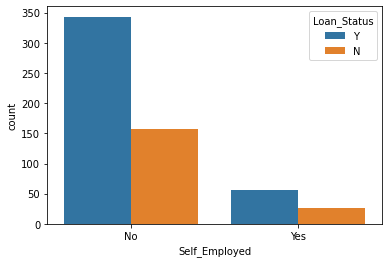

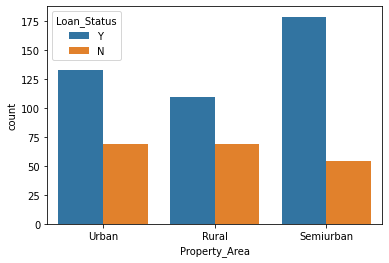

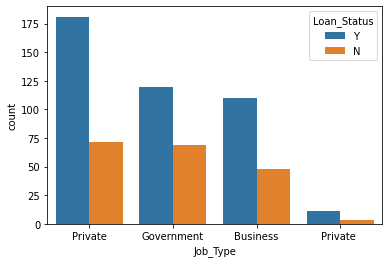

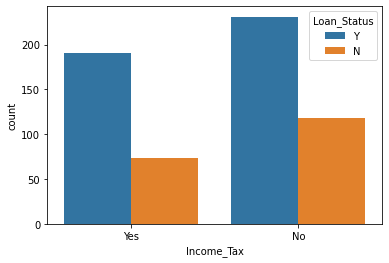

In [50]:
for i,feature in enumerate(cat_features):
    plt.figure(i)
    sns.countplot(x=feature,data=train,hue='Loan_Status')

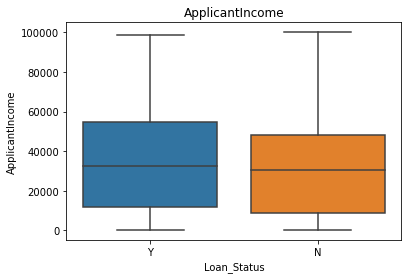

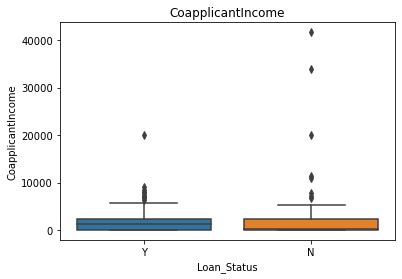

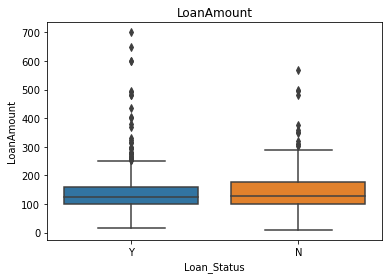

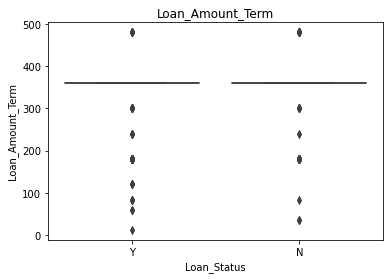

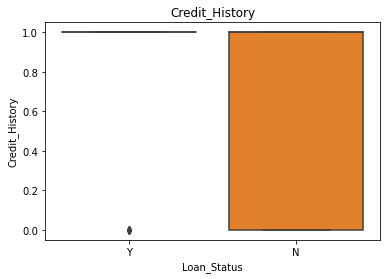

In [51]:
for i,feature in enumerate(num_features):
    plt.figure(i)
    sns.boxplot(y=feature,x='Loan_Status',data=train)
    plt.title(feature)
    plt.show()

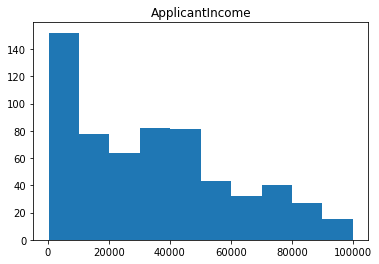

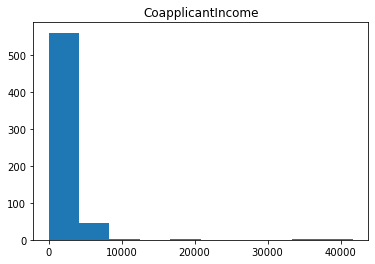

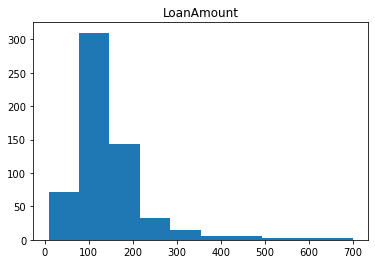

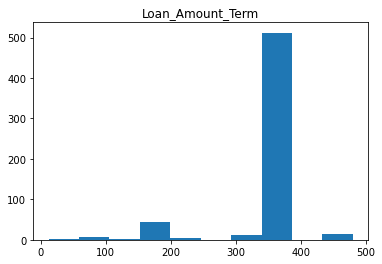

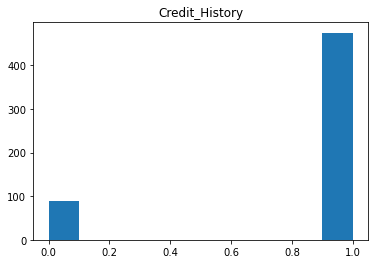

In [52]:
# checking the distribution of numerical features
for feature in num_features:
    plt.hist(train[feature])
    plt.title(feature)
    plt.show()

In [53]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Job_Type,Income_Tax
0,Male,No,0,Graduate,No,52000,0.0,NaN,360.0,1.0,Urban,Y,Private,Yes
1,Male,Yes,1,Graduate,No,30760,1508.0,128.0,360.0,1.0,Rural,N,Government,No
2,Male,Yes,0,Graduate,Yes,60000,0.0,66.0,360.0,1.0,Urban,Y,Private,Yes
3,Male,Yes,0,Not Graduate,No,42300,2358.0,120.0,360.0,1.0,Urban,Y,Business,Yes
4,Male,No,0,Graduate,No,20000,0.0,141.0,360.0,1.0,Urban,Y,Government,No


# Feature Engineering
Filling categorical features with mode

In [54]:
for feature in cat_features:
    train[feature]=train[feature].fillna(train[feature].mode()[0])
    test[feature]=test[feature].fillna(test[feature].mode()[0])   

Even though there are outliers in numerical features, it's better to fill nulls with mean rather than median. This would preserve the distribution on the data and would work perfectly fine even if a new input is an outlier. If we fill nulls with median the model would not work well for inputs which actually contain outliers.

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  Job_Type           614 non-null    object 
 13  Income_Tax         614 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 67.3+ KB


In [56]:
#### Encoding categrical Features: ##########

dict_1 = {'Urban':3, 'Semiurban':2 , 'Rural':1}
dict_2 = {'0':0,'1':1,'2':2,'3+':3}


train['Property_Area'] = train['Property_Area'].map(dict_1)
test['Property_Area'] = test['Property_Area'].map(dict_1)

train['Dependents'] = train['Dependents'].map(dict_2)
test['Dependents'] = test['Dependents'].map(dict_2)

train['Education'] = train['Education'].map({'Graduate':1,'Not Graduate':0})
test['Education'] = test['Education'].map({'Graduate':1,'Not Graduate':0})

train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)


In [57]:
''''for feature in num_features:
    plt.hist(train[feature])
    plt.title(feature)
    plt.show()'''

"'for feature in num_features:\n    plt.hist(train[feature])\n    plt.title(feature)\n    plt.show()"

In [58]:
for feature in num_features:
    train[feature]=train[feature].fillna(train[feature].mean())
for feature in num_features:
    test[feature]=test[feature].fillna(test[feature].mean())

In [59]:
train['Total_income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_income'] = test['ApplicantIncome']+test['CoapplicantIncome']

In [60]:
train.head()


,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Self_Employed_Yes,Loan_Status_Y,Job_Type_Government,Job_Type_Private,Job_Type_Private,Income_Tax_Yes,Total_income
0,0,1,52000,0.0,146.412162,360.0,1.0,3,1,0,0,1,0,1,0,1,52000.0
1,1,1,30760,1508.0,128.000000,360.0,1.0,1,1,1,0,0,1,0,0,0,32268.0
2,0,1,60000,0.0,66.000000,360.0,1.0,3,1,1,1,1,0,1,0,1,60000.0
3,0,0,42300,2358.0,120.000000,360.0,1.0,3,1,1,0,1,0,0,0,1,44658.0
4,0,1,20000,0.0,141.000000,360.0,1.0,3,1,0,0,1,1,0,0,0,20000.0


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dependents           614 non-null    int64  
 1   Education            614 non-null    int64  
 2   ApplicantIncome      614 non-null    int64  
 3   CoapplicantIncome    614 non-null    float64
 4   LoanAmount           614 non-null    float64
 5   Loan_Amount_Term     614 non-null    float64
 6   Credit_History       614 non-null    float64
 7   Property_Area        614 non-null    int64  
 8   Gender_Male          614 non-null    uint8  
 9   Married_Yes          614 non-null    uint8  
 10  Self_Employed_Yes    614 non-null    uint8  
 11  Loan_Status_Y        614 non-null    uint8  
 12  Job_Type_Government  614 non-null    uint8  
 13  Job_Type_Private     614 non-null    uint8  
 14  Job_Type_Private     614 non-null    uint8  
 15  Income_Tax_Yes       614 non-null    uin

In [62]:
train.to_csv('C:/Users/imu12/Downloads/mini project 2/dataset/modified_train.csv')
test.to_csv('C:/Users/imu12/Downloads/mini project 2/dataset/modified_test.csv')

In [67]:





oversample = RandomOverSampler(sampling_strategy=0.5)
X, y = oversample.fit_resample(X, y)



NameError: name 'X' is not defined